In [1]:
from sklearn import datasets

In [2]:
iris=datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [6]:
type(iris.data)

numpy.ndarray

In [17]:
type(iris.target)

numpy.ndarray

In [7]:
import pandas as pd

In [8]:
data=pd.DataFrame({
    'sepal length':iris.data[:,0],
    'sepal width':iris.data[:,1],
    'petal length':iris.data[:,2],
    'petal width':iris.data[:,3],
    'species':iris.target
})
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
x=data[['sepal length','sepal width','petal length','petal width']] #Features
y=data['species'] #Target

In [10]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [12]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=90)
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)

In [13]:
from sklearn import metrics
confusion_matrix=metrics.confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[14  0  0]
 [ 0 16  2]
 [ 0  1 12]]


In [14]:
metrics.accuracy_score(y_test,y_pred)

0.9333333333333333

In [15]:
clf.predict([[4,2,2,5]])

C:\Users\desir\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([2])

In [16]:
#Finding important features

import numpy as np

In [17]:
feature_imp=pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)

In [18]:
feature_imp

petal width (cm)     0.519219
petal length (cm)    0.351870
sepal length (cm)    0.100950
sepal width (cm)     0.027961
dtype: float64

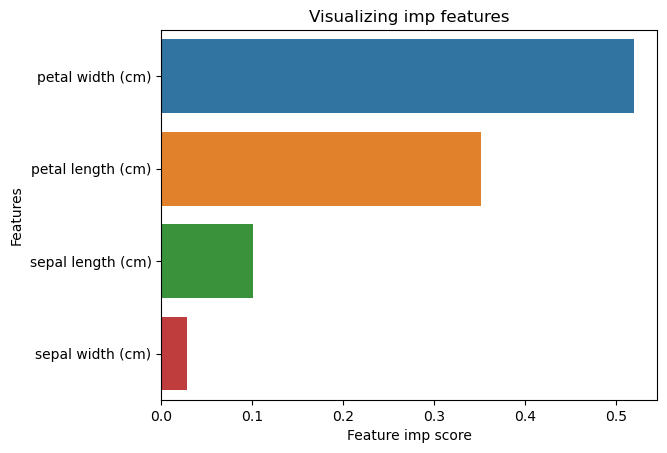

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating Bar Graph

sns.barplot(x=feature_imp,y=feature_imp.index,)
plt.xlabel("Feature imp score")
plt.ylabel('Features')
plt.title("Visualizing imp features")
plt.show()